Team Assignment - Part B (20 points):
Deliver project by building classification machine learning models in Python:
1. Complete the Machine Learning Canvas for this project. Think creatively. (3 points)
2. Apply three text representation techniques (Bag of Words, TF-IDF, n-Grams) for text vectorization. (6 points)
3. Develop Sentiment Analysis predictive models (binary classification) in Python, using Jupyter Notebook or any other tool of your
choice. Apply any three classification algorithms of your choice (example LogisticRegression, SVM, RandomForest). Apply Data
Science Process Model as a guide. (9 points)
4. Apply GridSearchCV to find the best hyperparameters for your models. (optional step)
5. Assess model performance (confusion matrix, precision, recall, ROC AUC) and interpret performance from business impact
viewpoint (false negatives vs false positives). (2 points)



# 1. Complete the Machine Learning Canvas for this project. Think creatively. (3 points)

## Goal:
For the end users of the predictive system built for sentiment analysis of Amazon product review data in the Health and Personal Care category, the goal is to provide valuable insights and actionable information. The system aims to assist users in making informed decisions, improving their decision-making processes, and enhancing customer satisfaction. Users can benefit from the system by gaining insights into customer sentiments, making informed product selections, managing feedback and reviews effectively, conducting competitor analysis, guiding product development and enhancement efforts, and optimizing the overall customer experience. The predictive system enables users to leverage sentiment analysis to drive business success and meet customer needs in the Health and Personal Care domain.

## Learn:
We can collect and analyze that user-generated data to obtain new data for sentiment analysis. We can extract the reviews from different platforms such as Amazon or Ebay.

## Predict:
In the context of sentiment analysis for Amazon product reviews in the Health and Personal Care category, the input to the predictive model would typically be the review text, which serves as the primary source of information for sentiment classification. The output of the model would be the predicted sentiment label, indicating whether the sentiment expressed in the review is positive or negative.

## Evaluate:
The metrics used to evaluate the performance of a sentiment analysis predictive model for Amazon product reviews in the Health and Personal Care category include accuracy, precision, recall, F1 score, confusion matrix, and ROC AUC. These metrics provide insights into the model's overall correctness, its ability to correctly classify positive and negative sentiments, and the trade-offs between false positives and false negatives. Evaluating the model's performance helps understand its effectiveness in capturing sentiment and guides decision-making for business applications. The choice of metrics depends on project goals, class imbalances, and the specific context of the analysis.





# 2. Apply three text representation techniques (Bag of Words, TF-IDF, n-Grams) for text vectorization. (6 points)


In [2]:
import pandas as pd

# Load the JSON data into a pandas DataFrame
df = pd.read_json('/Users/wendyma/Documents/MSBA/Spring/Application domain/final project/reviews_Health_and_Personal_Care_5.json',lines=True)


In [2]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5,Handy little gadget,1294185600,"01 5, 2011"
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4,Small & may need to encourage battery,1329523200,"02 18, 2012"
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4,Very good but not great,1275955200,"06 8, 2010"
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4,great addition to your purse,1202428800,"02 8, 2008"
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5,Very nice and convenient.,1313452800,"08 16, 2011"


In [3]:
len(df)

346355

In [4]:
df = df[df['overall'] != 3]  # won't use neutral feedback

In [5]:
len(df)


313101

In [4]:
pip install wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.


# wordcloud
### for positive review

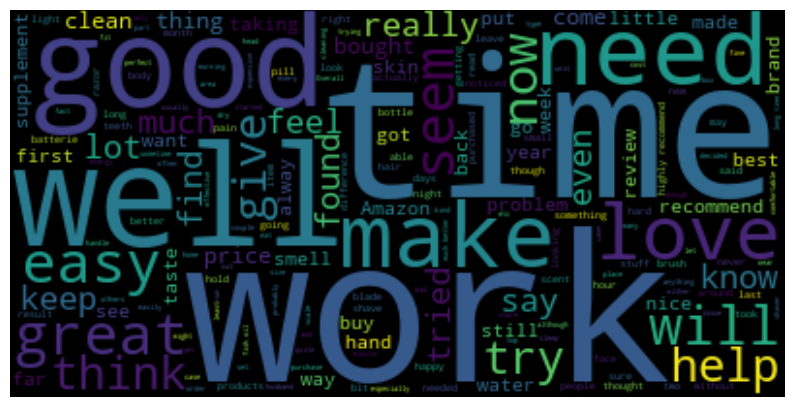

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

postive_review = df[df['overall']>3]['reviewText']
# Combine all reviews into one big text
# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["product", "day","use","using","one","used","take"])
text = ' '.join(review for review in postive_review)

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### for negative review

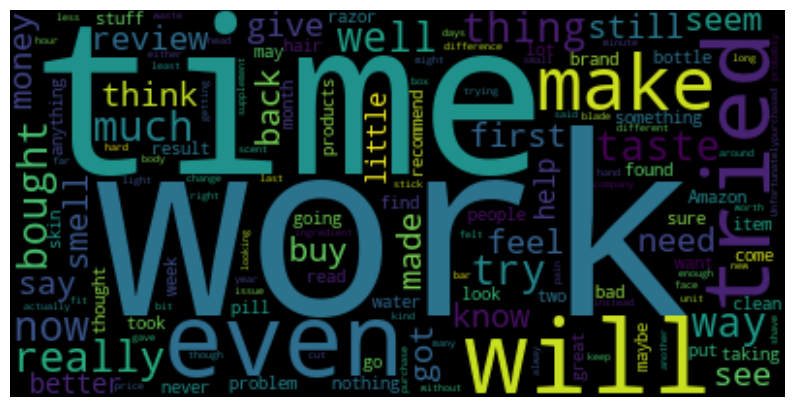

In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

negative_review = df[df['overall']<3]['reviewText']
# Combine all reviews into one big text
# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["product", "day","use","using","one","used","take","good"])
text = ' '.join(review for review in negative_review)

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# wordcloud after adding stopwords (including all the reviews)


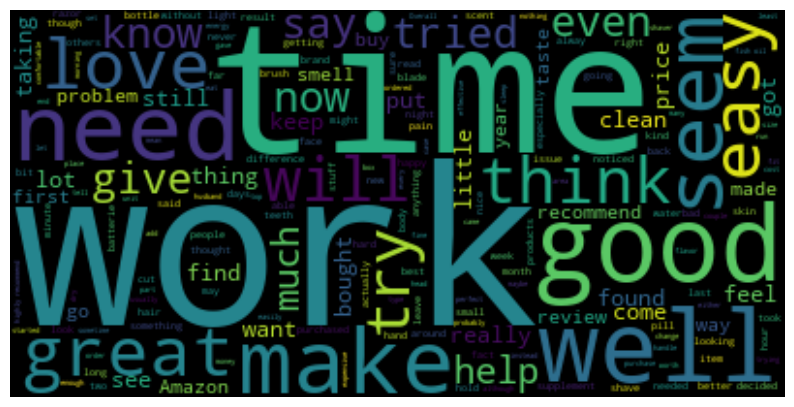

In [ ]:

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["product", "day","use","using","one","used","take"])

# Combine all reviews into one big text
text = ' '.join(review for review in df['reviewText'])

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords).generate(text)

# Display the generated image
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Bag of words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the transform
vectorizer = CountVectorizer(stop_words='english')

# Tokenize and build vocab
vectorizer.fit(df['reviewText'])

# Encode document
vector_bag = vectorizer.transform(df['reviewText'])

# Summarize encoded vector
print('Shape:', vector_bag.shape)
print('Bag of Words:', vector_bag.toarray())


Shape: (313101, 131332)
Bag of Words: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the transform
vectorizer = TfidfVectorizer(stop_words='english')

# Tokenize and build vocab
vectorizer.fit(df['reviewText'])

# Encode document
vector_TF = vectorizer.transform(df['reviewText'])

# Summarize encoded vector
print('Shape:', vector_TF.shape)
print('TF-IDF:', vector_TF.toarray())


Shape: (313101, 131332)
TF-IDF: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# n-Grams

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create the transform with bigram
vectorizer = CountVectorizer(ngram_range=(2, 2),stop_words='english')

# Tokenize and build vocab
vectorizer.fit(df['reviewText'])

# Encode document
vector_ngrams = vectorizer.transform(df['reviewText'])

# Summarize encoded vector
print('Shape:', vector_ngrams.shape)
print('n-Grams:', vector_ngrams.toarray())


# Model building

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Text cleaning
df['reviewText'] = df['reviewText'].str.replace('[^\w\s]','').str.lower()

# Convert 'overall' to binary format
df['sentiment'] = np.where(df['overall'] >= 4, 1, 0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['sentiment'], test_size=0.2, random_state=42)






/var/folders/5d/pdsph9q94hd61z04rdwj73600000gn/T/ipykernel_9029/97736253.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviewText'] = df['reviewText'].str.replace('[^\w\s]','').str.lower()


### Vectorize text data using bag of words

In [31]:
vectorizer_bag = CountVectorizer(stop_words='english')
X_train_vec_bag = vectorizer_bag.fit_transform(X_train)
X_test_vec_bag = vectorizer_bag.transform(X_test)

### Vectorize text data using TF-IDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_TF = TfidfVectorizer(stop_words='english')
X_train_vec_TF = vectorizer_TF.fit_transform(X_train)
X_test_vec_TF = vectorizer_TF.transform(X_test)


### Vectorize text data using n-grams

In [33]:
vectorize_ngrams = CountVectorizer(ngram_range=(2, 2),stop_words='english')
X_train_vec_ngrams = vectorize_ngrams.fit_transform(X_train)
X_test_vec_ngrams = vectorize_ngrams.transform(X_test)


### logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

In [62]:

# Logistic Regression
lr_bag = LogisticRegression()
lr_bag.fit(X_train_vec_bag, y_train)
lr_pred_bag = lr_bag.predict(X_test_vec_bag)
print('Logistic Regression using bag of words:')
print(classification_report(y_test, lr_pred_bag))
accuracy_logistic_bag = accuracy_score(y_test, lr_pred_bag)


lr_TF = LogisticRegression()
lr_TF.fit(X_train_vec_TF, y_train)
lr_pred_TF = lr_TF.predict(X_test_vec_TF)
print('Logistic Regression using bag of words:')
print(classification_report(y_test, lr_pred_TF))
accuracy_logistic_TF = accuracy_score(y_test, lr_pred_TF)

lr_ngrams = LogisticRegression()
lr_ngrams.fit(X_train_vec_ngrams, y_train)
lr_pred_ngrams = lr_ngrams.predict(X_test_vec_ngrams)
print('Logistic Regression using bag of words:')
print(classification_report(y_test, lr_pred_ngrams))
accuracy_logistic_ngrams = accuracy_score(y_test, lr_pred_ngrams)




/Users/wendyma/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression using bag of words:
              precision    recall  f1-score   support

           0       0.67      0.48      0.56      2056
           1       0.94      0.97      0.95     16730

    accuracy                           0.92     18786
   macro avg       0.81      0.73      0.76     18786
weighted avg       0.91      0.92      0.91     18786



/Users/wendyma/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression using bag of words:
              precision    recall  f1-score   support

           0       0.82      0.33      0.47      2056
           1       0.92      0.99      0.96     16730

    accuracy                           0.92     18786
   macro avg       0.87      0.66      0.71     18786
weighted avg       0.91      0.92      0.90     18786

Logistic Regression using bag of words:
              precision    recall  f1-score   support

           0       0.76      0.20      0.31      2056
           1       0.91      0.99      0.95     16730

    accuracy                           0.91     18786
   macro avg       0.84      0.59      0.63     18786
weighted avg       0.89      0.91      0.88     18786



/Users/wendyma/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
print('Accuracy of logistic Regression using bag of words:', accuracy_logistic_bag)
print('Accuracy of logistic Regression using TF-IDF:', accuracy_logistic_TF)
print('Accuracy of logistic Regression using n-grams:', accuracy_logistic_ngrams)

Accuracy of logistic Regression using bag of words: 0.9175449803044821
Accuracy of logistic Regression using TF-IDF: 0.918662834025338
Accuracy of logistic Regression using n-grams: 0.9054082827637603


# SVM

In [12]:
# Sample 30% of the DataFrame
df_sampled = df.sample(frac=0.3, random_state=42)

# Print the sampled DataFrame
print(df_sampled)

            reviewerID        asin                 reviewerName helpful  \
253332   ASN0XMU44EWK6  B005GJTO9S            Jacob R. Thompson  [1, 1]   
175023   A2BEG9BJV1H3Y  B002QZN8JW        Aaron H. Shiu "Airon"  [0, 0]   
225869  A2BYV7S1QP2YIG  B004EBMFT0  Dr. Oceanfront "Oceanfront"  [7, 7]   
111286   A48IIPXCUT1QS  B0016M4YQ2          Alice Cooper "Lala"  [0, 0]   
196936  A2ZTUBVE4ISCYX  B003BVICIM      emilyclare "emilyclare"  [1, 2]   
...                ...         ...                          ...     ...   
104823  A3KX6AX0ZSDFO8  B0013OXKHC                        betty  [0, 0]   
211444  A3M4QZCQV0GOUY  B003WJ85GM  Barbara L. Lutnick "Bonnie"  [0, 0]   
191561   AU1SKSAF00JJH  B0037KMI0A       J. Villeneuve "jayvil"  [0, 0]   
18865    ALNH0LZHUYS91  B00024CUCA     SeaScavenger "GuyAtTech"  [3, 5]   
9607    A2CM62J2BWEYQ9  B0000DIU49                    jbauch357  [0, 0]   

                                               reviewText  overall  \
253332  burns like fire  real

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(df_sampled['reviewText'], df_sampled['sentiment'], test_size=0.2, random_state=42)

vectorizer_bag = CountVectorizer(stop_words='english')
X_train_vec_bag_sample = vectorizer_bag.fit_transform(X_train)
X_test_vec_bag_sample = vectorizer_bag.transform(X_test)


vectorizer_TF = TfidfVectorizer(stop_words='english')
X_train_vec_TF_sample = vectorizer_TF.fit_transform(X_train)
X_test_vec_TF_sample = vectorizer_TF.transform(X_test)

vectorize_ngrams_sample = CountVectorizer(ngram_range=(2, 2),stop_words='english')
X_train_vec_ngrams_sample = vectorize_ngrams_sample.fit_transform(X_train)
X_test_vec_ngrams_sample = vectorize_ngrams_sample.transform(X_test)

In [57]:
# SVM
from sklearn import svm
svm_model_bag = svm.SVC(probability=True)
svm_model_bag.fit(X_train_vec_bag_sample, y_train)
svm_pred_bag = svm_model_bag.predict(X_test_vec_bag_sample)
print('SVM using bag of words:')
print(classification_report(y_test, svm_pred_bag))

accuracy_svm_bag = accuracy_score(y_test, svm_pred_bag)



svm_model_TF = svm.SVC(probability=True)
svm_model_TF.fit(X_train_vec_TF_sample, y_train)
svm_pred_TF = svm_model_TF.predict(X_test_vec_TF_sample)
print('SVM using TF-IDF:')
print(classification_report(y_test, svm_pred_TF))
accuracy_svm_TF = accuracy_score(y_test, svm_pred_TF)



svm_model_ngrams = svm.SVC(probability=True)
svm_model_ngrams.fit(X_train_vec_ngrams_sample, y_train)
svm_pred_ngrams = svm_model_ngrams.predict(X_test_vec_ngrams_sample)
print('SVM using n-grams:')
print(classification_report(y_test, svm_pred_ngrams))
accuracy_svm_ngrams = accuracy_score(y_test, svm_pred_ngrams)

SVM using bag of words:
              precision    recall  f1-score   support

           0       0.88      0.23      0.37      2056
           1       0.91      1.00      0.95     16730

    accuracy                           0.91     18786
   macro avg       0.90      0.61      0.66     18786
weighted avg       0.91      0.91      0.89     18786

SVM using TF-IDF:
              precision    recall  f1-score   support

           0       0.86      0.29      0.43      2056
           1       0.92      0.99      0.96     16730

    accuracy                           0.92     18786
   macro avg       0.89      0.64      0.69     18786
weighted avg       0.91      0.92      0.90     18786

SVM using n-grams:
              precision    recall  f1-score   support

           0       0.80      0.09      0.16      2056
           1       0.90      1.00      0.95     16730

    accuracy                           0.90     18786
   macro avg       0.85      0.54      0.55     18786
weighted avg 

In [58]:
print('Accuracy of SVM using bag of words:', accuracy_svm_bag)
print('Accuracy of SVM Regression using TF-IDF:', accuracy_svm_TF)
print('Accuracy of SVM Regression using n-grams:', accuracy_svm_ngrams)

Accuracy of SVM using bag of words: 0.912488022995848
Accuracy of SVM Regression using TF-IDF: 0.9167465133610135
Accuracy of SVM Regression using n-grams: 0.8977962312360268


# Random Forest

In [47]:
# Random Forest using bag of words
rf_bags = RandomForestClassifier()
rf_bags.fit(X_train_vec_bag, y_train)
rf_pred_bag = rf_bags.predict(X_test_vec_bag)
print('Random Forest using bag of words:')
print(classification_report(y_test, rf_pred_bag))
accuracy_rf_bag = accuracy_score(y_test, rf_pred_bag)

# Random Forest using TF-IDF
rf_TF = RandomForestClassifier()
rf_TF.fit(X_train_vec_TF, y_train)
rf_pred_TF = rf_TF.predict(X_test_vec_TF)
print('Random Forest using TF-IDF:')
print(classification_report(y_test, rf_pred_TF))
accuracy_rf_TF = accuracy_score(y_test, rf_pred_TF)


# Random Forest using n-grams
rf_ngrams = RandomForestClassifier()
rf_ngrams.fit(X_train_vec_ngrams, y_train)
rf_pred_ngrams = rf_ngrams.predict(X_test_vec_ngrams)
print('Random Forest using n-grams:')
print(classification_report(y_test, rf_pred_ngrams))
accuracy_rf_ngrams = accuracy_score(y_test, rf_pred_ngrams)




Random Forest using bag of words:
              precision    recall  f1-score   support

           0       0.88      0.07      0.13      2056
           1       0.90      1.00      0.95     16730

    accuracy                           0.90     18786
   macro avg       0.89      0.54      0.54     18786
weighted avg       0.90      0.90      0.86     18786

Random Forest using TF-IDF:
              precision    recall  f1-score   support

           0       0.91      0.07      0.13      2056
           1       0.90      1.00      0.95     16730

    accuracy                           0.90     18786
   macro avg       0.90      0.53      0.54     18786
weighted avg       0.90      0.90      0.86     18786

Random Forest using n-grams:
              precision    recall  f1-score   support

           0       0.59      0.20      0.29      2056
           1       0.91      0.98      0.94     16730

    accuracy                           0.90     18786
   macro avg       0.75      0.59    

In [48]:
print('Accuracy of random forest using bag of words:', accuracy_rf_bag)
print('Accuracy of random forest using TF-IDF:', accuracy_rf_TF)
print('Accuracy of random forest using n-grams:', accuracy_rf_ngrams)

Accuracy of random forest using bag of words: 0.8974768444586394
Accuracy of random forest using TF-IDF: 0.8972106888108166
Accuracy of random forest using n-grams: 0.8970509954221229


# summarize the accuracy


In [44]:
print('Accuracy of logistic Regression using bag of words:', accuracy_logistic_bag)
print('Accuracy of logistic Regression using TF-IDF:', accuracy_logistic_TF)
print('Accuracy of logistic Regression using n-grams:', accuracy_logistic_ngrams)

print('Accuracy of SVM using bag of words:', accuracy_svm_bag)
print('Accuracy of SVM Regression using TF-IDF:', accuracy_svm_TF)
print('Accuracy of SVM Regression using n-grams:', accuracy_svm_ngrams)

print('Accuracy of random forest using bag of words:', accuracy_rf_bag)
print('Accuracy of random forest using TF-IDF:', accuracy_rf_TF)
print('Accuracy of random forest using n-grams:', accuracy_rf_ngrams)

Accuracy of logistic Regression using bag of words: 0.9175449803044821
Accuracy of logistic Regression using TF-IDF: 0.918662834025338
Accuracy of logistic Regression using n-grams: 0.9054082827637603
Accuracy of SVM using bag of words: 0.912488022995848
Accuracy of SVM Regression using TF-IDF: 0.9167465133610135
Accuracy of SVM Regression using n-grams: 0.8977962312360268
Accuracy of random forest using bag of words: 0.8975833067177685
Accuracy of random forest using TF-IDF: 0.8972639199403811
Accuracy of random forest using n-grams: 0.8974236133290748


 ### Based on the accuracy results, the models using TF-IDF vectorization demonstrate relatively higher accuracy compared to the models using bag of words or n-grams. Therefore, we will focus on the three models that utilize TF-IDF vectorization to compare their performance.

# model performance

In [53]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

conf_mat = confusion_matrix(y_test, lr_pred_TF)
precision = precision_score(y_test, lr_pred_TF)
recall = recall_score(y_test, lr_pred_TF)
roc_auc = roc_auc_score(y_test, lr_pred_TF)

print('Model performance for logistic regression using TF-IDF:')
print('Confusion matrix:\n', conf_mat)
print('Precision: ', precision)
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('\n')

Model performance for logistic regression using TF-IDF:
Confusion matrix:
 [[  674  1382]
 [  146 16584]]
Precision:  0.9230769230769231
Recall:  0.991273161984459
ROC AUC:  0.6595470868288054




In [54]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

conf_mat = confusion_matrix(y_test, svm_pred_TF)
precision = precision_score(y_test, svm_pred_TF)
recall = recall_score(y_test, svm_pred_TF)
roc_auc = roc_auc_score(y_test, svm_pred_TF)

print('Model performance for SVM using TF-IDF:')
print('Confusion matrix:\n', conf_mat)
print('Precision: ', precision)
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('\n')

Model performance for SVM using TF-IDF:
Confusion matrix:
 [[  586  1470]
 [   94 16636]]
Precision:  0.9188114437203138
Recall:  0.9943813508667065
ROC AUC:  0.6397004030598124




In [55]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

conf_mat = confusion_matrix(y_test, rf_pred_TF)
precision = precision_score(y_test, rf_pred_TF)
recall = recall_score(y_test, rf_pred_TF)
roc_auc = roc_auc_score(y_test, rf_pred_TF)

print('Model performance for random forest using TF-IDF:')
print('Confusion matrix:\n', conf_mat)
print('Precision: ', precision)
print('Recall: ', recall)
print('ROC AUC: ', roc_auc)
print('\n')

Model performance for random forest using TF-IDF:
Confusion matrix:
 [[  139  1917]
 [   14 16716]]
Precision:  0.8971180164224762
Recall:  0.999163179916318
ROC AUC:  0.5333850919036843




# ROC plot

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [ ]:
# lr_prob_TF = lr_TF.predict_proba(X_test_vec_TF_sample)
# # Random Forest using TF-IDF
# fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob_TF[:, 1])
# roc_auc_lr = auc(fpr_lr, tpr_lr)
# plt.figure()
# lw = 2  # Line width

# # Bag of Words
# plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=lw, label='Bag of Words (AUC = %0.2f)' % roc_auc_lr)


In [71]:
# # Random Forest using TF-IDF
# rf_TF = RandomForestClassifier(probability=True)
# rf_TF.fit(X_train_vec_TF, y_train)
# rf_pred_TF = rf_TF.predict(X_test_vec_TF)
# print('Random Forest using TF-IDF:')
# print(classification_report(y_test, rf_pred_TF))
# accuracy_rf_TF = accuracy_score(y_test, rf_pred_TF)

svm_model_TF = svm.SVC(probability=True)
svm_model_TF.fit(X_train_vec_TF_sample, y_train)
svm_pred_TF = svm_model_TF.predict(X_test_vec_TF_sample)
print('SVM using TF-IDF:')
print(classification_report(y_test, svm_pred_TF))
accuracy_svm_TF = accuracy_score(y_test, svm_pred_TF)

# logistic regression
lr_prob_TF = lr_TF.predict_proba(X_test_vec_TF_sample)

# SVM
svm_prob_TF = svm_model_TF.predict_proba(X_test_vec_TF_sample)

# random forest
rf_prob_TF = rf_TF.predict_proba(X_test_vec_TF_sample)

# Random Forest using TF-IDF
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob_TF[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# TF-IDF
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_prob_TF[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# random forest using TF-IDF
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob_TF[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)



SVM using TF-IDF:
              precision    recall  f1-score   support

           0       0.86      0.29      0.43      2056
           1       0.92      0.99      0.96     16730

    accuracy                           0.92     18786
   macro avg       0.89      0.64      0.69     18786
weighted avg       0.91      0.92      0.90     18786



In [72]:
# Random Forest using TF-IDF
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_prob_TF[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# TF-IDF
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_prob_TF[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

# N-grams
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_prob_TF[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)


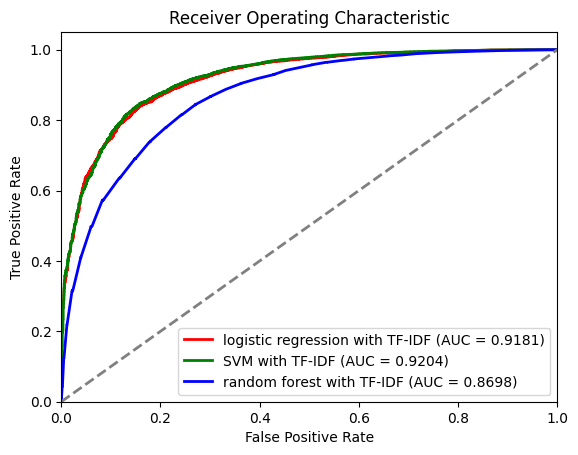

In [75]:
plt.figure()
lw = 2  # Line width

# Bag of Words
plt.plot(fpr_lr, tpr_lr, color='red', lw=lw, label='logistic regression with TF-IDF (AUC = %0.4f)' % roc_auc_lr)

# TF-IDF
plt.plot(fpr_svm, tpr_svm, color='green', lw=lw, label='SVM with TF-IDF (AUC = %0.4f)' % roc_auc_svm)

# N-grams
plt.plot(fpr_rf, tpr_rf, color='blue', lw=lw, label='random forest with TF-IDF (AUC = %0.4f)' % roc_auc_rf)

# Random Guess Line
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [83]:
# logistic regression
precision_lr_TF, recall_lr_TF, _ = roc_curve(y_test, lr_prob_TF[:, 1])
roc_auc_lr_prec = auc(fpr_lr, tpr_lr)

# TF-IDF
precision_svm_TF, recall_svm_TF, _ = roc_curve(y_test, svm_prob_TF[:, 1])


# random forest using TF-IDF
precision_rf_TF, recall_rf_TF, _ = roc_curve(y_test, rf_prob_TF[:, 1])



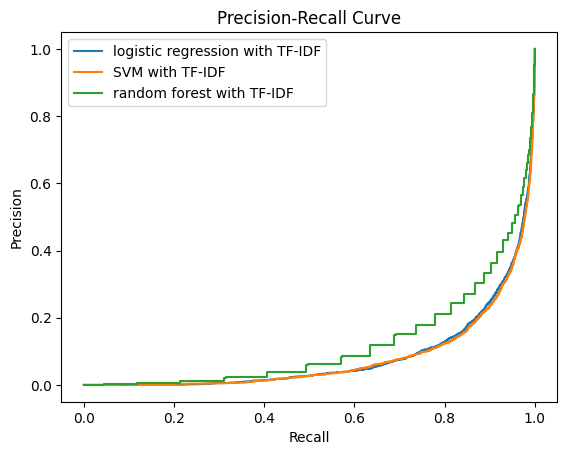

In [84]:
plt.figure()
plt.step(recall_lr_TF, precision_lr_TF, where='post', label='logistic regression with TF-IDF')
plt.step(recall_svm_TF, precision_svm_TF, where='post', label='SVM with TF-IDF')
plt.step(recall_rf_TF, precision_rf_TF, where='post', label='random forest with TF-IDF')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


# Business insights (false negative & false positive)

A false negative occurs when the model predicts a negative sentiment, but the actual sentiment is positive. From a business perspective, false negatives represent missed opportunities. It means that the model failed to identify positive sentiments, which could result in overlooking satisfied customers or positive feedback. False negatives can lead to missed chances for engagement, relationship building, or capturing positive sentiments that can be leveraged for marketing campaigns or improving customer experiences. It is crucial to address false negatives to ensure that positive sentiments are not disregarded.

On the other hand, false positives occur when the model predicts a positive sentiment, but the actual sentiment is negative. From a business viewpoint, false positives can be problematic as they may lead to incorrect assumptions about customer satisfaction or sentiment. False positives might result in misinterpreting negative feedback or failing to address customer concerns adequately. It is important to address false positives to ensure that negative sentiments are accurately identified and addressed to improve customer satisfaction and retention.

# ***********************************     optional         *******************************************************************

### grid search for logistic regression

In [ ]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

# Create a GridSearchCV object
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Fit the model
grid_search_lr.fit(X_train_vec, y_train)

# Print the best parameters
print("Best parameters for Logistic Regression: ", grid_search_lr.best_params_)



In [12]:
from sklearn.metrics import precision_score, recall_score

# Fit the model using best parameters
best_lr = LogisticRegression(**grid_search_lr.best_params_)
best_lr.fit(X_train_vec, y_train)

# Make predictions
y_pred = best_lr.predict(X_test_vec)

# Compute precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print precision and recall
print("Precision: ", precision)
print("Recall: ", recall)


Precision:  0.8785054370043333
Recall:  0.9598549274637319


/Users/wendyma/miniconda3/envs/tf/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### grid search for svm

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']}

# Create a GridSearchCV object
grid_search_svm = GridSearchCV(svm.SVC(), param_grid, cv=5)

# Fit the model
grid_search_svm.fit(X_train_vec, y_train)

# Print the best parameters
print("Best parameters for SVM: ", grid_search_svm.best_params_)


In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Fit the model using best parameters
best_svm = LogisticRegression(**grid_search_svm.best_params_)
best_svm.fit(X_train_vec, y_train)

# Make predictions
y_pred = best_svm.predict(X_test_vec)

# Compute precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print precision and recall
print("Precision: ", precision)
print("Recall: ", recall)

### grid search for random forest

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

# Fit the model
grid_search_rf.fit(X_train_vec, y_train)

# Print the best parameters
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)


## for model without grid search

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

# Let's assume lr, svm, and rf are the models you trained without GridSearchCV

models = [lr, svm, rf]
model_names = ['Logistic Regression', 'SVM', 'Random Forest']

for i, model in enumerate(models):
    # Make predictions
    y_pred = model.predict(X_test_vec)

    # Compute metrics
    conf_mat = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_names[i])
    print('Confusion matrix:\n', conf_mat)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('ROC AUC: ', roc_auc)
    print('\n')


## for model with grid search

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score

# Let's assume lr_best, svm_best, and rf_best are the best models found by GridSearchCV
models = [grid_search_lr.best_estimator_, grid_search_svm.best_estimator_, grid_search_rf.best_estimator_]
model_names = ['Logistic Regression', 'SVM', 'Random Forest']

for i, model in enumerate(models):
    # Make predictions
    y_pred = model.predict(X_test_vec)

    # Compute metrics
    conf_mat = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_names[i])
    print('Confusion matrix:\n', conf_mat)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('ROC AUC: ', roc_auc)
    print('\n')


# ****************************************************************************

# Business insights (false negative & false positive)

A false negative occurs when the model predicts a negative sentiment, but the actual sentiment is positive. From a business perspective, false negatives represent missed opportunities. It means that the model failed to identify positive sentiments, which could result in overlooking satisfied customers or positive feedback. False negatives can lead to missed chances for engagement, relationship building, or capturing positive sentiments that can be leveraged for marketing campaigns or improving customer experiences. It is crucial to address false negatives to ensure that positive sentiments are not disregarded.

On the other hand, false positives occur when the model predicts a positive sentiment, but the actual sentiment is negative. From a business viewpoint, false positives can be problematic as they may lead to incorrect assumptions about customer satisfaction or sentiment. False positives might result in misinterpreting negative feedback or failing to address customer concerns adequately. It is important to address false positives to ensure that negative sentiments are accurately identified and addressed to improve customer satisfaction and retention.